In [4]:
# displays static in notebook
%matplotlib inline  
# displays interactive outside notebook
#%matplotlib   
# displays interactive in notebook
#%matplotlib notebook  


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import astropy.units as u

#from astropy import units as u
from astropy.coordinates import SkyCoord

folder = ''

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

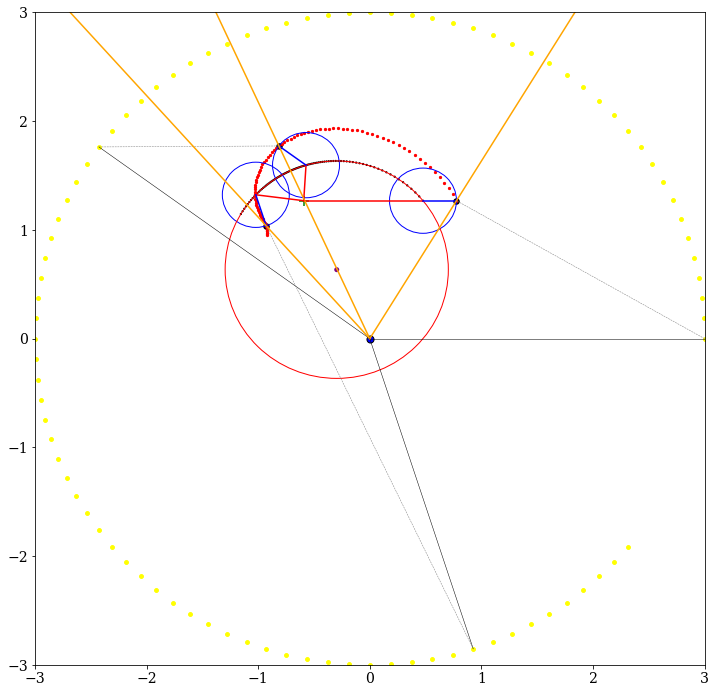

In [138]:
# test model

planetType = 'superior'  # deferent progresses at motionRate relative to equant, epicycle parallels sun
#planetType = 'inferior'  # epicycle progresses at motionRate relative to deferent, deferent parallels sun
R_e = 0.3          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.7             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
motionRate = 0.6  # deferent orbital frequency, measured from equant
apogeeAngle = 115   # 
R = 1.0

#USER DEFINABLE TOGGLE
if planetType == 'superior':
    #SUPERIOR planet
    deferentRate = motionRate
    epicycleRate = 1.0
else:
    #INFERIOR planet
    deferentRate = 1.0
    epicycleRate = motionRate


# calculate rate at which center of epicycle rotates relative to equant
omega = 2.0*np.pi * deferentRate  # frequency in radian / year


# for just plotting, this is fine    
t = np.arange(0,0.9,0.01)        # time in simulation units, earth years



# deferentAngle could be handled differently in simulation, using time increment rather than array of time values
#  something like:
#  deferentAngle = deferentAngle + deferentRate * deltaT
deferentAngle = omega * t
while(np.sum(deferentAngle>2*np.pi) > 0):
    deferentAngle[deferentAngle>2*np.pi] += -2*np.pi

#print(deferentAngle)
 
#calculate distance from equant to epicycle center at each time
# from law of cosines
a = 1.0
# Aaaaaargh, it took me an hour to spot the 2pi in this - should just be pi (for 180 degrees)
#b = -2.0 * eccentricity * np.cos(2*np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
b = -2.0 * eccentricity * np.cos(np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
c = eccentricity**2 - R**2
discriminant = b**2 - 4.0 * a * c
R_equant_epicycle = (-1.0 * b + discriminant**(0.5)) / (2.0*a)

# at least it led me to crunch through the algebra to have a more elegant solution
# probably better to keep the quadratic solution above, for clarity
# R_equant_epicycle = eccentricity * np.cos(np.pi - apogeeAngle * np.pi / 180 + deferentAngle) + (R**2 - eccentricity**2 * (np.sin(np.pi - apogeeAngle * np.pi / 180 + deferentAngle))**2)**(0.5)

#print(a,b,c, discriminant, R_equant_epicycle)
#print(np.min(R_equant_epicycle), np.max(R_equant_epicycle))


# equant is at twice the eccentricity distance from Earth
x_equant = 2*eccentricity * np.cos(apogeeAngle*np.pi/180)
y_equant = 2*eccentricity * np.sin(apogeeAngle*np.pi/180)
#print('equant: ', x_equant, y_equant)

# center of deferent is at the eccentricity distance from Earth
x_center = eccentricity * np.cos(apogeeAngle*np.pi/180)
y_center = eccentricity * np.sin(apogeeAngle*np.pi/180)
#print('center of deferent: ', x_center, y_center)

# R_equant_epicycle tells us how far the center of the epicycle is from equant
# deferentAngle tells us angle from zero, relative to equant.  Zero is straight to the right from the equant
x_deferent = R_equant_epicycle * np.cos(deferentAngle)
y_deferent = R_equant_epicycle * np.sin(deferentAngle)

# motion around epicycle
x_epicycle = R_e*np.cos(2.0*np.pi*epicycleRate*t)           # x along the epicycle
y_epicycle = R_e*np.sin(2.0*np.pi*epicycleRate*t)           # y along the epicycle

# coordinates of planet, in earth centered coordinates
x_planet = x_equant + x_deferent + x_epicycle
y_planet = y_equant + y_deferent + y_epicycle
ecliptic_longitude = np.arctan2(y_planet, x_planet) * 180/np.pi

# coordinates of sun on display, in earth centered coordinates
x_sun = 3*R*np.cos(2.0*np.pi*t)           
y_sun = 3*R*np.sin(2.0*np.pi*t)
sun_longitude = np.arctan2(y_sun, x_sun) * 180 / np.pi


#for i in np.arange(len(t)):
#    if (i % 100) == 0:
#        print(i,t[i],deferentAngle[i]*180/np.pi,R_equant_epicycle[i],x_deferent[i],y_deferent[i],x_epicycle[i],y_epicycle[i])


# time series plots of coordinates for troubleshooting

#plt.figure(figsize=(12,4))
#plt.title('deferent relative to equant')
#plt.plot(t, x_deferent, c = 'red',linestyle='-',label='x')   # add the position of the center of the epicycle and the planet's position around the epicycle
#plt.plot(t, y_deferent, c = 'blue',linestyle='-',label='y')   # add the position of the center of the epicycle and the planet's position around the epicycle
#plt.legend()

#plt.figure(figsize=(12,4))
#plt.title('planet relative to center of epicycle')
#plt.plot(t, x_epicycle, c = 'red',linestyle='-',label='x')   # add the position of the center of the epicycle and the planet's position around the epicycle
#plt.plot(t, y_epicycle, c = 'blue',linestyle='-',label='y')   # add the position of the center of the epicycle and the planet's position around the epicycle
#plt.legend()

#plt.figure(figsize=(12,4))
#plt.title('planet relative to earth')
#plt.plot(t, x_planet, c = 'red',linestyle='-',label='x')   # add the position of the center of the epicycle and the planet's position around the epicycle
#plt.plot(t, y_planet, c = 'blue',linestyle='-',label='y')   # add the position of the center of the epicycle and the planet's position around the epicycle
#plt.legend()

#plt.figure(figsize=(12,4))
#plt.title('relative to equant')
#plt.plot(t, deferentAngle, c = 'red',linestyle='-',label='deferent angle')   # add the position of the center of the epicycle and the planet's position around the epicycle
#plt.plot(t, R_equant_epicycle, c = 'blue',linestyle='-',label='equant - deferent distance')   # add the position of the center of the epicycle and the planet's position around the epicycle
#plt.legend()


# top down view of geometry

plt.figure(figsize=(12,12))
plt.xlim(-3,3)
plt.ylim(-3,3)

#  intermitent plots to show the state every 40 steps
for i in np.arange(len(t)):
    if (i % 40) == 0:
        # show equant vector
        plt.plot([x_equant+x_deferent[i], x_equant],[y_equant+y_deferent[i],y_equant], c = 'red',linestyle='-')
        # show epicycle
        circle2=plt.Circle((x_equant+x_deferent[i],y_equant+y_deferent[i]),R_e,color='blue',fill=False)
        plt.gcf().gca().add_artist(circle2)
        # show epicycle-planet line
        plt.plot([x_equant+x_deferent[i], x_planet[i]],[y_equant+y_deferent[i],y_planet[i]], c = 'blue',linestyle='-')
        # show planet vector
        plt.plot([0,5*R*np.cos(ecliptic_longitude[i]*np.pi/180)], [0,5*R*np.sin(ecliptic_longitude[i]*np.pi/180)],c='orange')
        # highlight planet position
        plt.scatter(x_planet[i],y_planet[i], c = 'black',s=30)   
        # show earth-sun line
        plt.plot([0,x_sun[i]],[0,y_sun[i]], c = 'black',linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle
        # connect planet and sun to help with tracking
        plt.plot([x_sun[i],x_planet[i]],[y_sun[i],y_planet[i]], c = 'gray',linestyle='--', linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle


# display Earth
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')

# display deferent and its center
plt.scatter([x_center],[y_center], c = 'purple', s = 25, edgecolors = 'none')
circle1=plt.Circle((x_center,y_center),R,color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
plt.scatter([x_equant+x_deferent],[y_equant+y_deferent], c = 'black', s = 5, edgecolors = 'none')

# display equant
plt.scatter([x_equant],[y_equant], c = 'green', s = 100, marker='+')

# display planet
plt.scatter(x_planet,y_planet, c = 'red',s=5)   # add the position of the center of the epicycle and the planet's position around the epicycle
# display sun
plt.scatter(x_sun,y_sun, c = 'yellow',s=15)   # add the position of the center of the epicycle and the planet's position around the epicycle




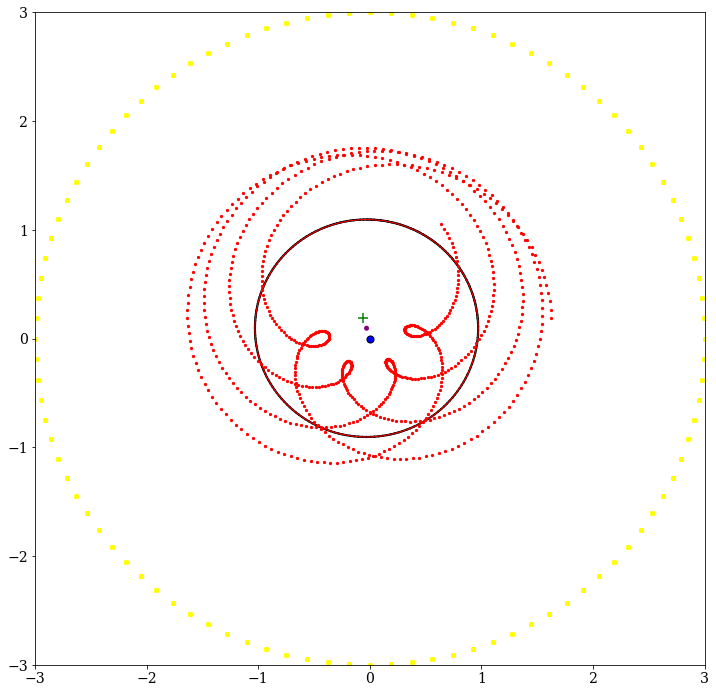

In [144]:
# Mars

years = 8

planetType = 'superior'  # deferent progresses at motionRate relative to equant, epicycle parallels sun
#planetType = 'inferior'  # epicycle progresses at motionRate relative to deferent, deferent parallels sun
R_e = 0.66          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.10             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
motionRate = 0.531  # deferent orbital frequency, measured from equant
apogeeAngle = 106.7   # 
R = 1.0

#USER DEFINABLE TOGGLE
if planetType == 'superior':
    #SUPERIOR planet
    deferentRate = motionRate
    epicycleRate = 1.0
else:
    #INFERIOR planet
    deferentRate = 1.0
    epicycleRate = motionRate



# for just plotting, this is fine    
t = np.arange(0,years,0.01)        # time in simulation units, earth years


# calculate rate at which center of epicycle rotates relative to equant
omega = 2.0*np.pi * deferentRate  # frequency in radian / year

# deferentAngle could be handled differently in simulation, using time increment rather than array of time values
#  something like:
#  deferentAngle = deferentAngle + deferentRate * deltaT
deferentAngle = omega * t
while(np.sum(deferentAngle>2*np.pi) > 0):
    deferentAngle[deferentAngle>2*np.pi] += -2*np.pi


#calculate distance from equant to epicycle center at each time
# from law of cosines
a = 1.0
# Aaaaaargh, it took me an hour to spot the 2pi in this - should just be pi (for 180 degrees)
#b = -2.0 * eccentricity * np.cos(2*np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
b = -2.0 * eccentricity * np.cos(np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
c = eccentricity**2 - R**2
discriminant = b**2 - 4.0 * a * c
R_equant_epicycle = (-1.0 * b + discriminant**(0.5)) / (2.0*a)


# equant is at twice the eccentricity distance from Earth
x_equant = 2*eccentricity * np.cos(apogeeAngle*np.pi/180)
y_equant = 2*eccentricity * np.sin(apogeeAngle*np.pi/180)

# center of deferent is at the eccentricity distance from Earth
x_center = eccentricity * np.cos(apogeeAngle*np.pi/180)
y_center = eccentricity * np.sin(apogeeAngle*np.pi/180)

# R_equant_epicycle tells us how far the center of the epicycle is from equant
# deferentAngle tells us angle from zero, relative to equant.  Zero is straight to the right from the equant
x_deferent = R_equant_epicycle * np.cos(deferentAngle)
y_deferent = R_equant_epicycle * np.sin(deferentAngle)

# motion around epicycle
x_epicycle = R_e*np.cos(2.0*np.pi*epicycleRate*t)           # x along the epicycle
y_epicycle = R_e*np.sin(2.0*np.pi*epicycleRate*t)           # y along the epicycle

# coordinates of planet, in earth centered coordinates
x_planet = x_equant + x_deferent + x_epicycle
y_planet = y_equant + y_deferent + y_epicycle
ecliptic_longitude = np.arctan2(y_planet, x_planet) * 180/np.pi

# coordinates of sun on display, in earth centered coordinates
x_sun = 3*R*np.cos(2.0*np.pi*t)           
y_sun = 3*R*np.sin(2.0*np.pi*t)
sun_longitude = np.arctan2(y_sun, x_sun) * 180 / np.pi


# top down view of geometry

plt.figure(figsize=(12,12))
plt.xlim(-3,3)
plt.ylim(-3,3)

#  intermitent plots to show the state every 40 steps
if False:
    for i in np.arange(len(t)):
        if (i % 40) == 0:
            # show equant vector
            plt.plot([x_equant+x_deferent[i], x_equant],[y_equant+y_deferent[i],y_equant], c = 'red',linestyle='-')
            # show epicycle
            circle2=plt.Circle((x_equant+x_deferent[i],y_equant+y_deferent[i]),R_e,color='blue',fill=False)
            plt.gcf().gca().add_artist(circle2)
            # show epicycle-planet line
            plt.plot([x_equant+x_deferent[i], x_planet[i]],[y_equant+y_deferent[i],y_planet[i]], c = 'blue',linestyle='-')
            # show planet vector
            plt.plot([0,5*R*np.cos(ecliptic_longitude[i]*np.pi/180)], [0,5*R*np.sin(ecliptic_longitude[i]*np.pi/180)],c='orange')
            # highlight planet position
            plt.scatter(x_planet[i],y_planet[i], c = 'black',s=30)   
            # show earth-sun line
            plt.plot([0,x_sun[i]],[0,y_sun[i]], c = 'black',linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle
            # connect planet and sun to help with tracking
            plt.plot([x_sun[i],x_planet[i]],[y_sun[i],y_planet[i]], c = 'gray',linestyle='--', linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle


# display Earth
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')

# display deferent and its center
plt.scatter([x_center],[y_center], c = 'purple', s = 25, edgecolors = 'none')
circle1=plt.Circle((x_center,y_center),R,color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
plt.scatter([x_equant+x_deferent],[y_equant+y_deferent], c = 'black', s = 5, edgecolors = 'none')

# display equant
plt.scatter([x_equant],[y_equant], c = 'green', s = 100, marker='+')

# display planet
plt.scatter(x_planet,y_planet, c = 'red',s=5)   # add the position of the center of the epicycle and the planet's position around the epicycle
# display sun
plt.scatter(x_sun,y_sun, c = 'yellow',s=15)   # add the position of the center of the epicycle and the planet's position around the epicycle




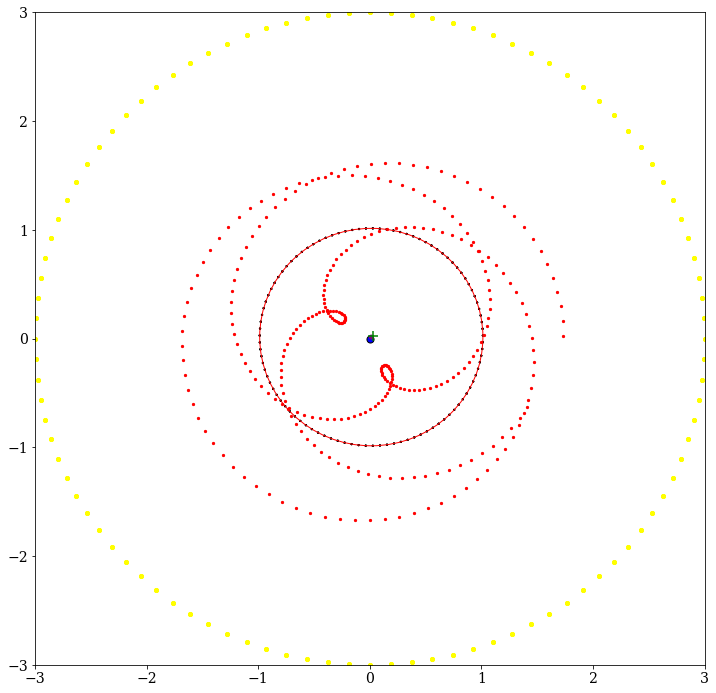

In [146]:
# Venus

years = 3

#planetType = 'superior'  # deferent progresses at motionRate relative to equant, epicycle parallels sun
planetType = 'inferior'  # epicycle progresses at motionRate relative to deferent, deferent parallels sun
R_e = 0.72          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.02             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
motionRate = 1.62  # deferent orbital frequency, measured from equant
apogeeAngle = 46.2   # 
R = 1.0

#USER DEFINABLE TOGGLE
if planetType == 'superior':
    #SUPERIOR planet
    deferentRate = motionRate
    epicycleRate = 1.0
else:
    #INFERIOR planet
    deferentRate = 1.0
    epicycleRate = motionRate



# for just plotting, this is fine    
t = np.arange(0,years,0.01)        # time in simulation units, earth years


# calculate rate at which center of epicycle rotates relative to equant
omega = 2.0*np.pi * deferentRate  # frequency in radian / year

# deferentAngle could be handled differently in simulation, using time increment rather than array of time values
#  something like:
#  deferentAngle = deferentAngle + deferentRate * deltaT
deferentAngle = omega * t
while(np.sum(deferentAngle>2*np.pi) > 0):
    deferentAngle[deferentAngle>2*np.pi] += -2*np.pi


#calculate distance from equant to epicycle center at each time
# from law of cosines
a = 1.0
# Aaaaaargh, it took me an hour to spot the 2pi in this - should just be pi (for 180 degrees)
#b = -2.0 * eccentricity * np.cos(2*np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
b = -2.0 * eccentricity * np.cos(np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
c = eccentricity**2 - R**2
discriminant = b**2 - 4.0 * a * c
R_equant_epicycle = (-1.0 * b + discriminant**(0.5)) / (2.0*a)


# equant is at twice the eccentricity distance from Earth
x_equant = 2*eccentricity * np.cos(apogeeAngle*np.pi/180)
y_equant = 2*eccentricity * np.sin(apogeeAngle*np.pi/180)

# center of deferent is at the eccentricity distance from Earth
x_center = eccentricity * np.cos(apogeeAngle*np.pi/180)
y_center = eccentricity * np.sin(apogeeAngle*np.pi/180)

# R_equant_epicycle tells us how far the center of the epicycle is from equant
# deferentAngle tells us angle from zero, relative to equant.  Zero is straight to the right from the equant
x_deferent = R_equant_epicycle * np.cos(deferentAngle)
y_deferent = R_equant_epicycle * np.sin(deferentAngle)

# motion around epicycle
x_epicycle = R_e*np.cos(2.0*np.pi*epicycleRate*t)           # x along the epicycle
y_epicycle = R_e*np.sin(2.0*np.pi*epicycleRate*t)           # y along the epicycle

# coordinates of planet, in earth centered coordinates
x_planet = x_equant + x_deferent + x_epicycle
y_planet = y_equant + y_deferent + y_epicycle
ecliptic_longitude = np.arctan2(y_planet, x_planet) * 180/np.pi

# coordinates of sun on display, in earth centered coordinates
x_sun = 3*R*np.cos(2.0*np.pi*t)           
y_sun = 3*R*np.sin(2.0*np.pi*t)
sun_longitude = np.arctan2(y_sun, x_sun) * 180 / np.pi


# top down view of geometry

plt.figure(figsize=(12,12))
plt.xlim(-3,3)
plt.ylim(-3,3)

#  intermitent plots to show the state every 40 steps
if False:
    for i in np.arange(len(t)):
        if (i % 40) == 0:
            # show equant vector
            plt.plot([x_equant+x_deferent[i], x_equant],[y_equant+y_deferent[i],y_equant], c = 'red',linestyle='-')
            # show epicycle
            circle2=plt.Circle((x_equant+x_deferent[i],y_equant+y_deferent[i]),R_e,color='blue',fill=False)
            plt.gcf().gca().add_artist(circle2)
            # show epicycle-planet line
            plt.plot([x_equant+x_deferent[i], x_planet[i]],[y_equant+y_deferent[i],y_planet[i]], c = 'blue',linestyle='-')
            # show planet vector
            plt.plot([0,5*R*np.cos(ecliptic_longitude[i]*np.pi/180)], [0,5*R*np.sin(ecliptic_longitude[i]*np.pi/180)],c='orange')
            # highlight planet position
            plt.scatter(x_planet[i],y_planet[i], c = 'black',s=30)   
            # show earth-sun line
            plt.plot([0,x_sun[i]],[0,y_sun[i]], c = 'black',linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle
            # connect planet and sun to help with tracking
            plt.plot([x_sun[i],x_planet[i]],[y_sun[i],y_planet[i]], c = 'gray',linestyle='--', linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle


# display Earth
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')

# display deferent and its center
plt.scatter([x_center],[y_center], c = 'purple', s = 25, edgecolors = 'none')
circle1=plt.Circle((x_center,y_center),R,color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
plt.scatter([x_equant+x_deferent],[y_equant+y_deferent], c = 'black', s = 5, edgecolors = 'none')

# display equant
plt.scatter([x_equant],[y_equant], c = 'green', s = 100, marker='+')

# display planet
plt.scatter(x_planet,y_planet, c = 'red',s=5)   # add the position of the center of the epicycle and the planet's position around the epicycle
# display sun
plt.scatter(x_sun,y_sun, c = 'yellow',s=15)   # add the position of the center of the epicycle and the planet's position around the epicycle




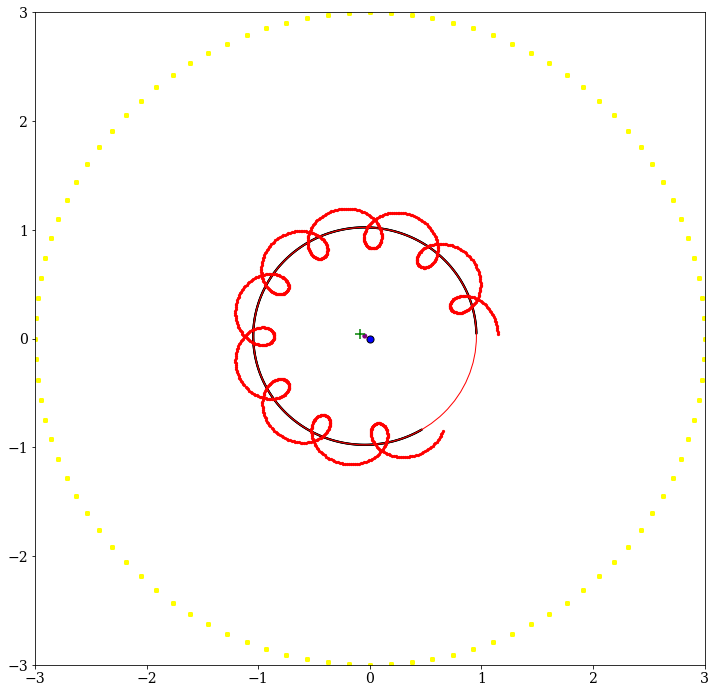

In [149]:
# Jupiter

years = 10

planetType = 'superior'  # deferent progresses at motionRate relative to equant, epicycle parallels sun
#planetType = 'inferior'  # epicycle progresses at motionRate relative to deferent, deferent parallels sun
R_e = 0.19          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.05             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
motionRate = 0.084  # deferent orbital frequency, measured from equant
apogeeAngle = 152.2   # 
R = 1.0

#USER DEFINABLE TOGGLE
if planetType == 'superior':
    #SUPERIOR planet
    deferentRate = motionRate
    epicycleRate = 1.0
else:
    #INFERIOR planet
    deferentRate = 1.0
    epicycleRate = motionRate



# for just plotting, this is fine    
t = np.arange(0,years,0.01)        # time in simulation units, earth years


# calculate rate at which center of epicycle rotates relative to equant
omega = 2.0*np.pi * deferentRate  # frequency in radian / year

# deferentAngle could be handled differently in simulation, using time increment rather than array of time values
#  something like:
#  deferentAngle = deferentAngle + deferentRate * deltaT
deferentAngle = omega * t
while(np.sum(deferentAngle>2*np.pi) > 0):
    deferentAngle[deferentAngle>2*np.pi] += -2*np.pi


#calculate distance from equant to epicycle center at each time
# from law of cosines
a = 1.0
# Aaaaaargh, it took me an hour to spot the 2pi in this - should just be pi (for 180 degrees)
#b = -2.0 * eccentricity * np.cos(2*np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
b = -2.0 * eccentricity * np.cos(np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
c = eccentricity**2 - R**2
discriminant = b**2 - 4.0 * a * c
R_equant_epicycle = (-1.0 * b + discriminant**(0.5)) / (2.0*a)


# equant is at twice the eccentricity distance from Earth
x_equant = 2*eccentricity * np.cos(apogeeAngle*np.pi/180)
y_equant = 2*eccentricity * np.sin(apogeeAngle*np.pi/180)

# center of deferent is at the eccentricity distance from Earth
x_center = eccentricity * np.cos(apogeeAngle*np.pi/180)
y_center = eccentricity * np.sin(apogeeAngle*np.pi/180)

# R_equant_epicycle tells us how far the center of the epicycle is from equant
# deferentAngle tells us angle from zero, relative to equant.  Zero is straight to the right from the equant
x_deferent = R_equant_epicycle * np.cos(deferentAngle)
y_deferent = R_equant_epicycle * np.sin(deferentAngle)

# motion around epicycle
x_epicycle = R_e*np.cos(2.0*np.pi*epicycleRate*t)           # x along the epicycle
y_epicycle = R_e*np.sin(2.0*np.pi*epicycleRate*t)           # y along the epicycle

# coordinates of planet, in earth centered coordinates
x_planet = x_equant + x_deferent + x_epicycle
y_planet = y_equant + y_deferent + y_epicycle
ecliptic_longitude = np.arctan2(y_planet, x_planet) * 180/np.pi

# coordinates of sun on display, in earth centered coordinates
x_sun = 3*R*np.cos(2.0*np.pi*t)           
y_sun = 3*R*np.sin(2.0*np.pi*t)
sun_longitude = np.arctan2(y_sun, x_sun) * 180 / np.pi


# top down view of geometry

plt.figure(figsize=(12,12))
plt.xlim(-3,3)
plt.ylim(-3,3)

#  intermitent plots to show the state every 40 steps
if False:
    for i in np.arange(len(t)):
        if (i % 40) == 0:
            # show equant vector
            plt.plot([x_equant+x_deferent[i], x_equant],[y_equant+y_deferent[i],y_equant], c = 'red',linestyle='-')
            # show epicycle
            circle2=plt.Circle((x_equant+x_deferent[i],y_equant+y_deferent[i]),R_e,color='blue',fill=False)
            plt.gcf().gca().add_artist(circle2)
            # show epicycle-planet line
            plt.plot([x_equant+x_deferent[i], x_planet[i]],[y_equant+y_deferent[i],y_planet[i]], c = 'blue',linestyle='-')
            # show planet vector
            plt.plot([0,5*R*np.cos(ecliptic_longitude[i]*np.pi/180)], [0,5*R*np.sin(ecliptic_longitude[i]*np.pi/180)],c='orange')
            # highlight planet position
            plt.scatter(x_planet[i],y_planet[i], c = 'black',s=30)   
            # show earth-sun line
            plt.plot([0,x_sun[i]],[0,y_sun[i]], c = 'black',linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle
            # connect planet and sun to help with tracking
            plt.plot([x_sun[i],x_planet[i]],[y_sun[i],y_planet[i]], c = 'gray',linestyle='--', linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle


# display Earth
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')

# display deferent and its center
plt.scatter([x_center],[y_center], c = 'purple', s = 25, edgecolors = 'none')
circle1=plt.Circle((x_center,y_center),R,color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
plt.scatter([x_equant+x_deferent],[y_equant+y_deferent], c = 'black', s = 5, edgecolors = 'none')

# display equant
plt.scatter([x_equant],[y_equant], c = 'green', s = 100, marker='+')

# display planet
plt.scatter(x_planet,y_planet, c = 'red',s=5)   # add the position of the center of the epicycle and the planet's position around the epicycle
# display sun
plt.scatter(x_sun,y_sun, c = 'yellow',s=15)   # add the position of the center of the epicycle and the planet's position around the epicycle




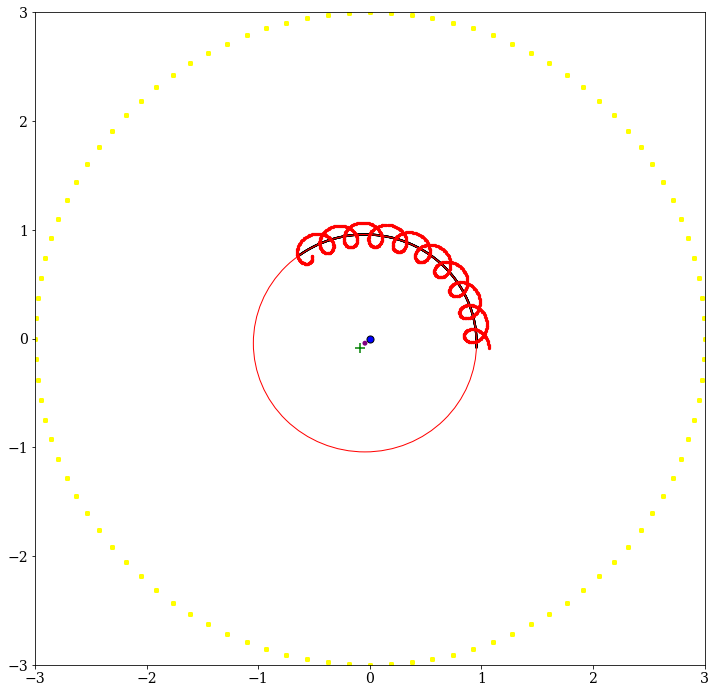

In [151]:
# Saturn

years = 10

planetType = 'superior'  # deferent progresses at motionRate relative to equant, epicycle parallels sun
#planetType = 'inferior'  # epicycle progresses at motionRate relative to deferent, deferent parallels sun
R_e = 0.11          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.06             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
motionRate = 0.034  # deferent orbital frequency, measured from equant
apogeeAngle = 224.2   # 
R = 1.0

#USER DEFINABLE TOGGLE
if planetType == 'superior':
    #SUPERIOR planet
    deferentRate = motionRate
    epicycleRate = 1.0
else:
    #INFERIOR planet
    deferentRate = 1.0
    epicycleRate = motionRate



# for just plotting, this is fine    
t = np.arange(0,years,0.01)        # time in simulation units, earth years


# calculate rate at which center of epicycle rotates relative to equant
omega = 2.0*np.pi * deferentRate  # frequency in radian / year

# deferentAngle could be handled differently in simulation, using time increment rather than array of time values
#  something like:
#  deferentAngle = deferentAngle + deferentRate * deltaT
deferentAngle = omega * t
while(np.sum(deferentAngle>2*np.pi) > 0):
    deferentAngle[deferentAngle>2*np.pi] += -2*np.pi


#calculate distance from equant to epicycle center at each time
# from law of cosines
a = 1.0
# Aaaaaargh, it took me an hour to spot the 2pi in this - should just be pi (for 180 degrees)
#b = -2.0 * eccentricity * np.cos(2*np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
b = -2.0 * eccentricity * np.cos(np.pi - apogeeAngle * np.pi / 180 + deferentAngle)
c = eccentricity**2 - R**2
discriminant = b**2 - 4.0 * a * c
R_equant_epicycle = (-1.0 * b + discriminant**(0.5)) / (2.0*a)


# equant is at twice the eccentricity distance from Earth
x_equant = 2*eccentricity * np.cos(apogeeAngle*np.pi/180)
y_equant = 2*eccentricity * np.sin(apogeeAngle*np.pi/180)

# center of deferent is at the eccentricity distance from Earth
x_center = eccentricity * np.cos(apogeeAngle*np.pi/180)
y_center = eccentricity * np.sin(apogeeAngle*np.pi/180)

# R_equant_epicycle tells us how far the center of the epicycle is from equant
# deferentAngle tells us angle from zero, relative to equant.  Zero is straight to the right from the equant
x_deferent = R_equant_epicycle * np.cos(deferentAngle)
y_deferent = R_equant_epicycle * np.sin(deferentAngle)

# motion around epicycle
x_epicycle = R_e*np.cos(2.0*np.pi*epicycleRate*t)           # x along the epicycle
y_epicycle = R_e*np.sin(2.0*np.pi*epicycleRate*t)           # y along the epicycle

# coordinates of planet, in earth centered coordinates
x_planet = x_equant + x_deferent + x_epicycle
y_planet = y_equant + y_deferent + y_epicycle
ecliptic_longitude = np.arctan2(y_planet, x_planet) * 180/np.pi

# coordinates of sun on display, in earth centered coordinates
x_sun = 3*R*np.cos(2.0*np.pi*t)           
y_sun = 3*R*np.sin(2.0*np.pi*t)
sun_longitude = np.arctan2(y_sun, x_sun) * 180 / np.pi


# top down view of geometry

plt.figure(figsize=(12,12))
plt.xlim(-3,3)
plt.ylim(-3,3)

#  intermitent plots to show the state every 40 steps
if False:
    for i in np.arange(len(t)):
        if (i % 40) == 0:
            # show equant vector
            plt.plot([x_equant+x_deferent[i], x_equant],[y_equant+y_deferent[i],y_equant], c = 'red',linestyle='-')
            # show epicycle
            circle2=plt.Circle((x_equant+x_deferent[i],y_equant+y_deferent[i]),R_e,color='blue',fill=False)
            plt.gcf().gca().add_artist(circle2)
            # show epicycle-planet line
            plt.plot([x_equant+x_deferent[i], x_planet[i]],[y_equant+y_deferent[i],y_planet[i]], c = 'blue',linestyle='-')
            # show planet vector
            plt.plot([0,5*R*np.cos(ecliptic_longitude[i]*np.pi/180)], [0,5*R*np.sin(ecliptic_longitude[i]*np.pi/180)],c='orange')
            # highlight planet position
            plt.scatter(x_planet[i],y_planet[i], c = 'black',s=30)   
            # show earth-sun line
            plt.plot([0,x_sun[i]],[0,y_sun[i]], c = 'black',linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle
            # connect planet and sun to help with tracking
            plt.plot([x_sun[i],x_planet[i]],[y_sun[i],y_planet[i]], c = 'gray',linestyle='--', linewidth=0.5)   # add the position of the center of the epicycle and the planet's position around the epicycle


# display Earth
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')

# display deferent and its center
plt.scatter([x_center],[y_center], c = 'purple', s = 25, edgecolors = 'none')
circle1=plt.Circle((x_center,y_center),R,color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
plt.scatter([x_equant+x_deferent],[y_equant+y_deferent], c = 'black', s = 5, edgecolors = 'none')

# display equant
plt.scatter([x_equant],[y_equant], c = 'green', s = 100, marker='+')

# display planet
plt.scatter(x_planet,y_planet, c = 'red',s=5)   # add the position of the center of the epicycle and the planet's position around the epicycle
# display sun
plt.scatter(x_sun,y_sun, c = 'yellow',s=15)   # add the position of the center of the epicycle and the planet's position around the epicycle


